In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import cv2

import functions as fn

In [3]:
dataDir='../data'
trainDir='train2017'
valDir='val2017'

trainAnn=f'{dataDir}/annotations/instances_{trainDir}.json'
valAnn=f'{dataDir}/annotations/instances_{valDir}.json'

cocoTrain=COCO(trainAnn)
cocoVal=COCO(valAnn)

catIdsTrain = cocoTrain.getCatIds(catNms=['person'])
imgIdsTrain = cocoTrain.getImgIds(catIds=catIdsTrain)
imgIdsTrain = cocoTrain.getImgIds(imgIds=imgIdsTrain)

catIdsVal = cocoVal.getCatIds(catNms=['person'])
imgIdsVal = cocoVal.getImgIds(catIds=catIdsVal)
imgIdsVal = cocoVal.getImgIds(imgIds=imgIdsVal)

loading annotations into memory...
Done (t=9.97s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


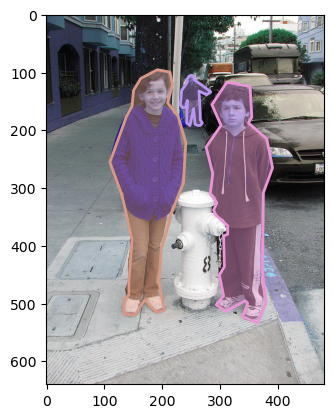

In [4]:
img = {'license': 3,
 'file_name': '000000102771.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000102771.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-16 21:36:01',
 'flickr_url': 'http://farm4.staticflickr.com/3141/3060074174_c540b56d2e_z.jpg',
 'id': 102771}

fpath = '{}/{}/{}'.format(dataDir, trainDir, img['file_name'])

test_img = cv2.imread(fpath, -1)

plt.imshow(test_img)

anns_ids = cocoTrain.getAnnIds(imgIds=img['id'], catIds=catIdsTrain, iscrowd=None)
anns = cocoTrain.loadAnns(anns_ids)
cocoTrain.showAnns(anns)

In [5]:
test_img

array([[[ 71,  85,  84],
        [ 54,  84, 101],
        [ 39,  81,  94],
        ...,
        [164, 182, 213],
        [149, 177, 194],
        [157, 174, 177]],

       [[ 60,  79,  82],
        [ 50,  80,  99],
        [ 44,  77,  92],
        ...,
        [126, 140, 169],
        [111, 149, 151],
        [122, 159, 155]],

       [[ 53,  81,  88],
        [ 56,  83, 104],
        [ 57,  79,  97],
        ...,
        [139, 118, 173],
        [122, 143, 151],
        [122, 154, 159]],

       ...,

       [[196, 188, 195],
        [145, 139, 144],
        [191, 188, 190],
        ...,
        [189, 189, 189],
        [192, 191, 193],
        [178, 177, 181]],

       [[137, 126, 134],
        [180, 173, 178],
        [190, 185, 187],
        ...,
        [181, 185, 180],
        [185, 188, 186],
        [183, 185, 185]],

       [[164, 150, 161],
        [201, 190, 198],
        [179, 174, 176],
        ...,
        [189, 193, 187],
        [183, 187, 182],
        [181, 184, 182]]

In [6]:
test_img[0][0]

array([71, 85, 84], dtype=uint8)

In [7]:
removed_true_blacks = np.zeros_like(test_img)

In [8]:
test_img.shape

(640, 480, 3)

In [9]:
removed_true_blacks.shape

(640, 480, 3)

In [10]:
fn.display_image(removed_true_blacks)

In [11]:
fn.display_image(test_img)

In [12]:
for x, y, z in np.ndindex(test_img.shape):
    temp = test_img[x][y]
    if np.sum(temp) > 0:
        removed_true_blacks[x][y] = temp
    else:
        removed_true_blacks[x][y] = np.array([1, 0, 0])

In [13]:
test_img[0][0]

array([71, 85, 84], dtype=uint8)

In [14]:
fn.display_image(removed_true_blacks)

In [15]:
test_removed_true_blacks = fn.remove_true_blacks(test_img)

In [16]:
fn.display_image(test_removed_true_blacks)

In [18]:
np.array_equal(test_removed_true_blacks, removed_true_blacks)

True

In [19]:
np.array_equal(test_removed_true_blacks, test_img)

False